In [166]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from PIL import ImageStat
import glob

In [7]:
path = './data/images/segment-1231623110026745648_480_000_500_000_with_camera_labels_38.png'

In [3]:
color_threshold = [128, 128, 128]

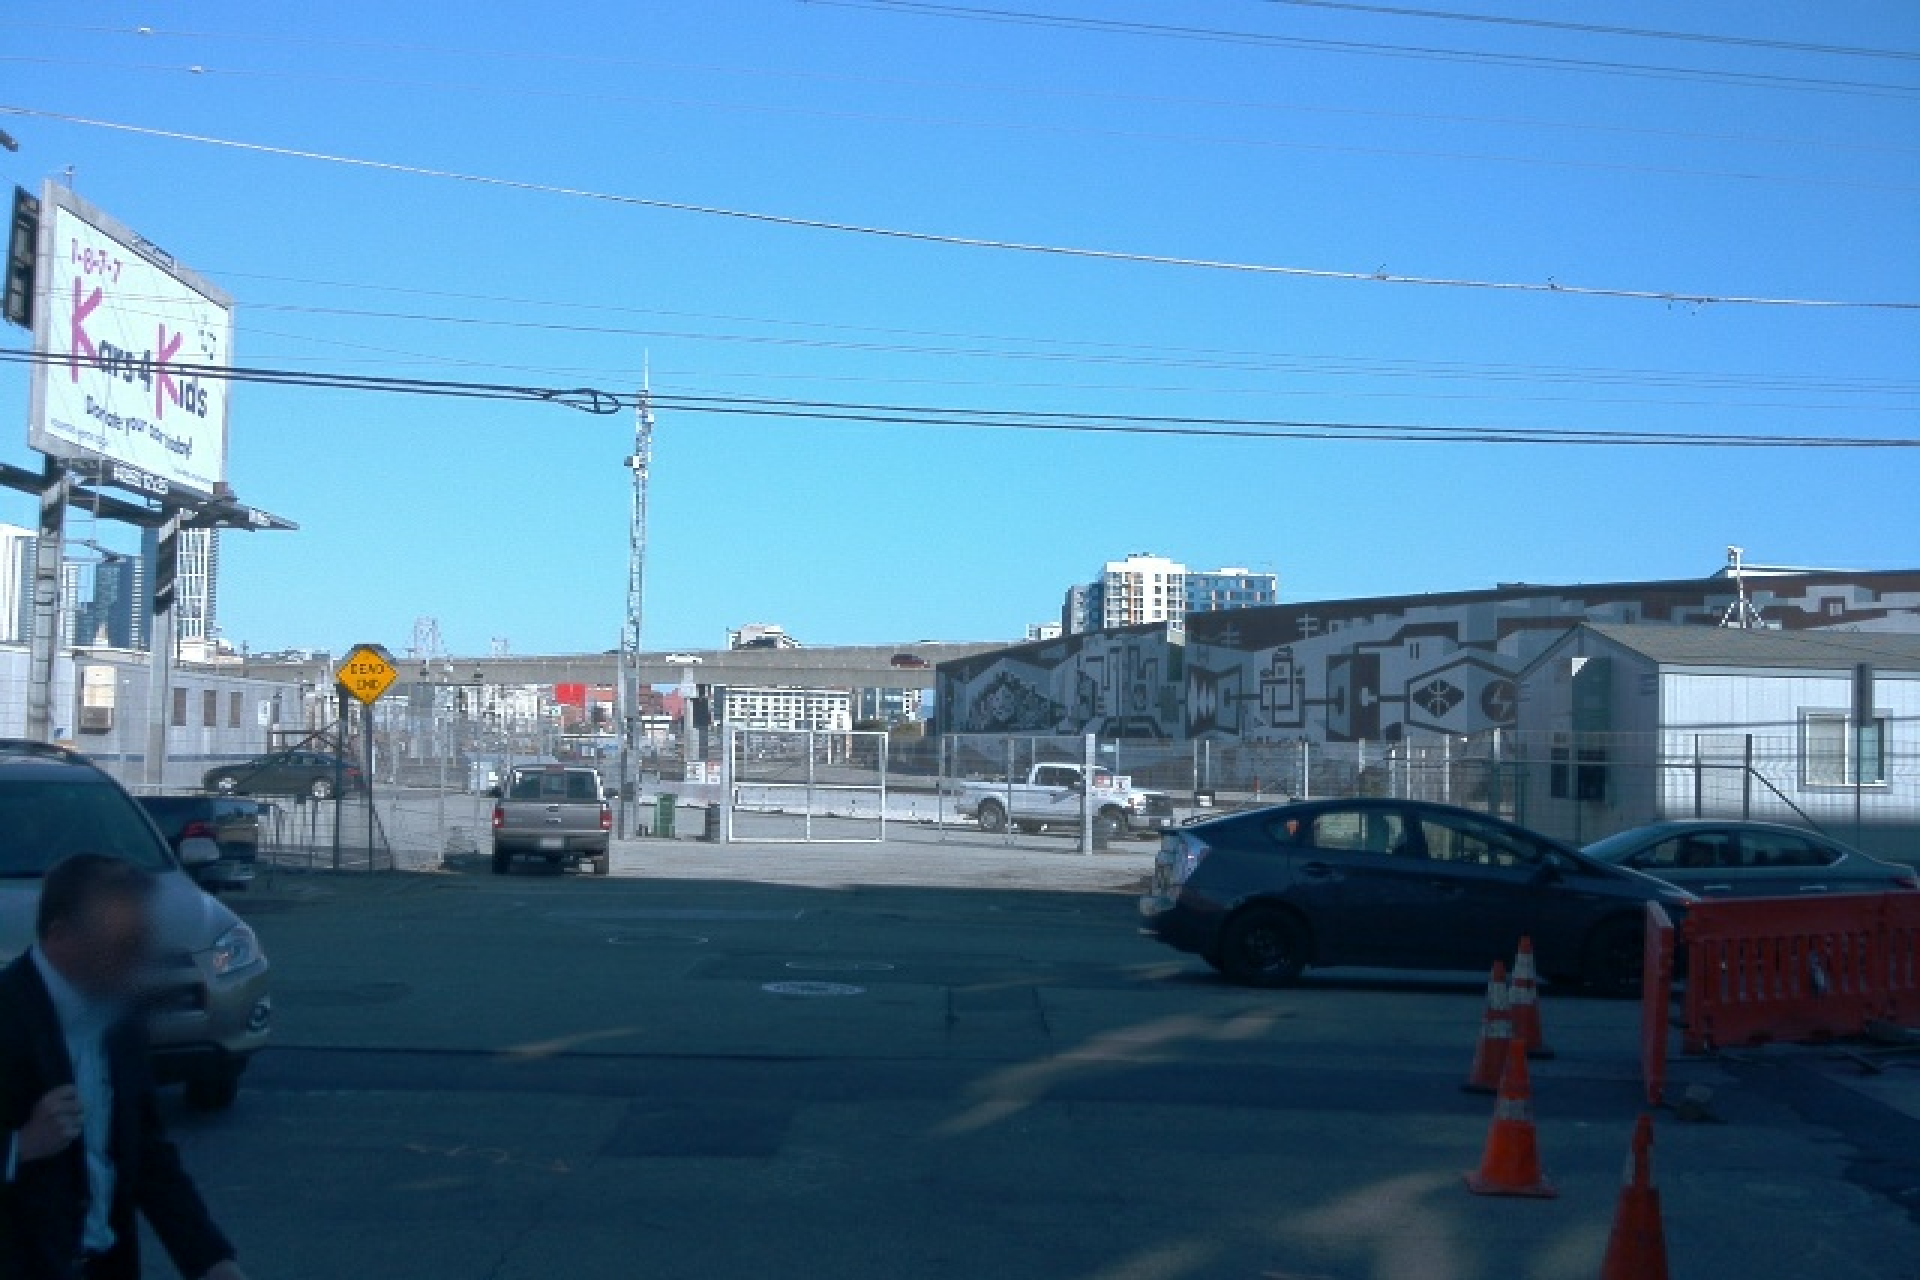

In [13]:
Image.open(path)

In [15]:
img = np.array(Image.open(path).convert('RGB'))
img

array([[[ 83, 161, 243],
        [ 83, 161, 243],
        [ 83, 161, 243],
        ...,
        [ 68, 136, 207],
        [ 68, 136, 207],
        [ 68, 136, 207]],

       [[ 83, 161, 243],
        [ 83, 161, 243],
        [ 83, 161, 243],
        ...,
        [ 68, 136, 207],
        [ 68, 136, 207],
        [ 68, 136, 207]],

       [[ 82, 159, 241],
        [ 82, 159, 241],
        [ 82, 159, 241],
        ...,
        [ 68, 136, 207],
        [ 68, 136, 207],
        [ 68, 136, 207]],

       ...,

       [[  0,   9,  11],
        [  0,   9,  11],
        [  0,   9,  11],
        ...,
        [ 13,  38,  60],
        [ 13,  38,  60],
        [ 13,  38,  60]],

       [[  0,   9,  11],
        [  0,   9,  11],
        [  0,   9,  11],
        ...,
        [ 10,  35,  57],
        [ 10,  35,  57],
        [ 10,  35,  57]],

       [[  0,   9,  11],
        [  0,   9,  11],
        [  0,   9,  11],
        ...,
        [ 10,  35,  57],
        [ 10,  35,  57],
        [ 10,  35,  57]]

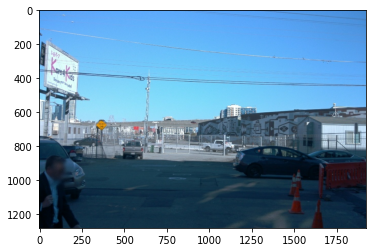

In [37]:
plt.imshow(img)

In [20]:
img[:, : , 0] > 128

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [21]:
img[:, : , 1] > 128

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [23]:
mask_idx = (img[:, : , 0] > color_threshold[0]) & (img[:, : , 1] > color_threshold[1]) & (img[:, : , 2] > color_threshold[2])
mask_idx

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

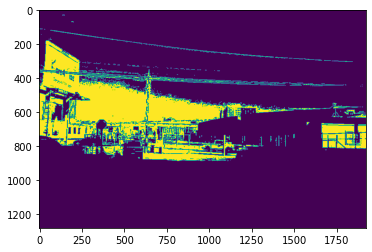

In [39]:
plt.imshow(mask_idx)

In [24]:
mask_idx.shape

(1280, 1920)

In [105]:
mask = np.zeros(mask_idx.shape, dtype=int)
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [106]:
mask[mask_idx] = 1
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [107]:
np.max(mask)

1

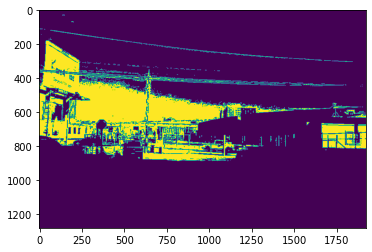

In [108]:
plt.imshow(mask)

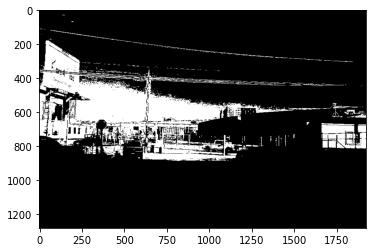

In [109]:
plt.imshow(mask, cmap='gray')

In [110]:
stacked_mask = np.stack([mask, mask, mask], axis=2)
stacked_mask

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]])

In [111]:
np.min(stacked_mask), np.max(stacked_mask)

(0, 1)

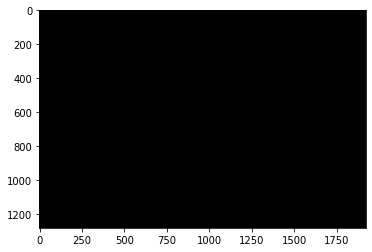

In [112]:
plt.imshow(stacked_mask) # 1 is near dark color

In [113]:
masked_img = img * stacked_mask
masked_img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]])

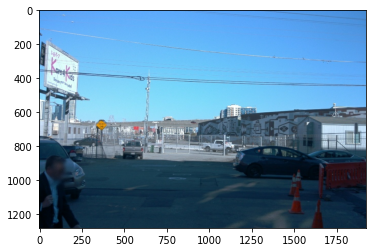

In [114]:
plt.imshow(img)

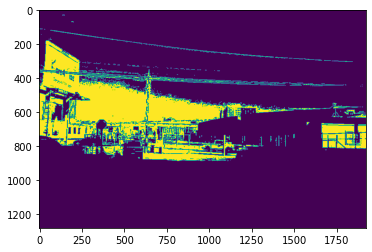

In [115]:
plt.imshow(mask)

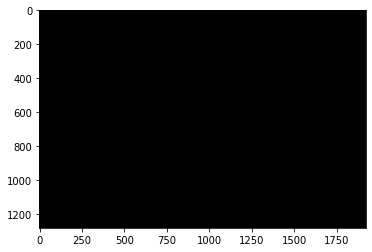

In [116]:
plt.imshow(stacked_mask)

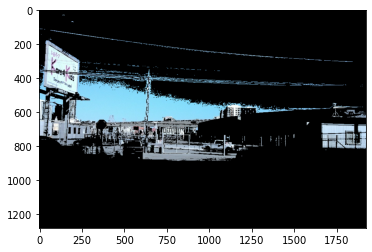

In [117]:
plt.imshow(masked_img)

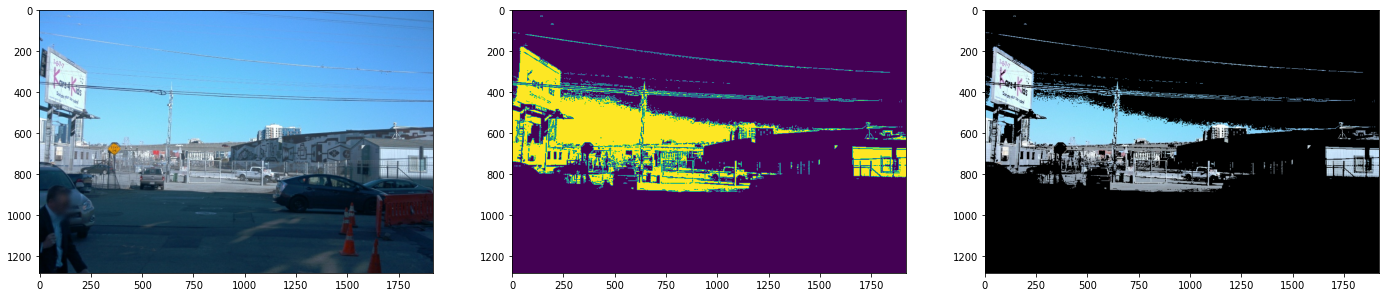

In [119]:
f, ax = plt.subplots(1, 3, figsize=(24, 24))

ax[0].imshow(img)
ax[1].imshow(mask)
ax[2].imshow(masked_img)

plt.show()

In [125]:
pil_image = Image.open(path).convert('RGB')

In [126]:
type(pil_image)

PIL.Image.Image

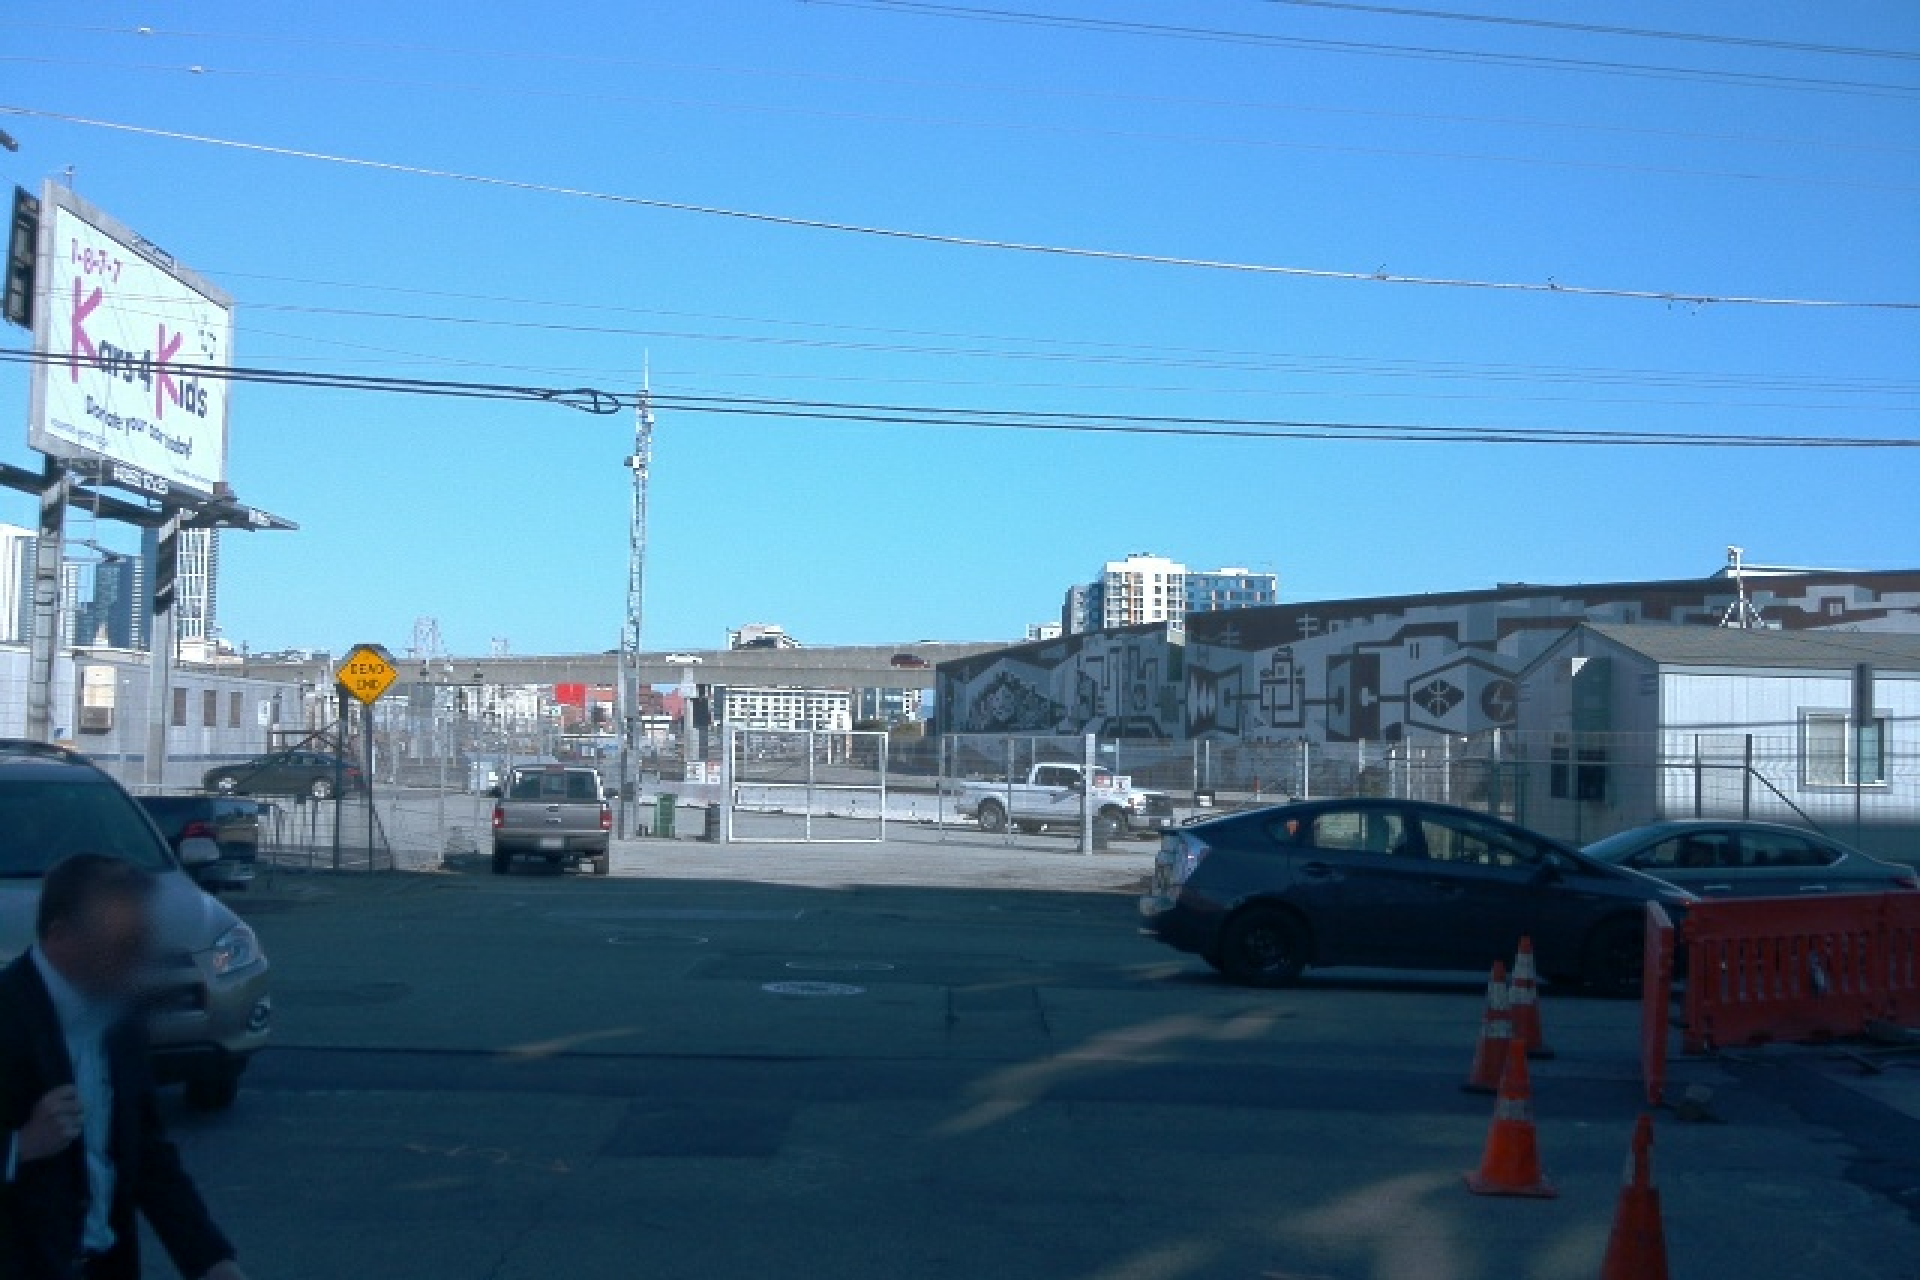

In [127]:
pil_image

In [131]:
img_stat = ImageStat.Stat(pil_image)
img_stat

In [132]:
img_stat.extrema

[(0, 255), (0, 255), (0, 255)]

In [155]:
count = img_stat.count
count

[2457600, 2457600, 2457600]

In [134]:
img_stat.sum

[197537472.0, 313428726.0, 401414256.0]

In [180]:
img_stat.mean, type(img_stat.mean)

([80.378203125, 127.53447509765626, 163.33587890625], list)

In [136]:
img_stat.median

[91, 153, 183]

In [137]:
img_stat.rms

[96.48104136447449, 145.80365688096882, 184.7801015338274]

In [138]:
img_stat.var

[2847.9358051696777, 4993.664021428578, 7465.076584774399]

In [139]:
img_stat.stddev

[53.36605480237112, 70.66586178225366, 86.4006746777732]

In [160]:
hist = np.array(pil_image.histogram())
type(hist), hist.shape

(numpy.ndarray, (768,))

In [161]:
hist

array([ 61260,  15192,  11886,  10524,   9690,   9840,   9342,  10668,
        12198,  14400,  16926,  19266,  22554,  27450,  34800,  40152,
        44934,  45816,  44136,  38280,  30642,  25266,  21924,  20472,
        18792,  18522,  18000,  15714,  12576,  11448,  10524,   9960,
         9186,   8976,   8418,   8148,   7938,   8916,   8892,   8916,
         9036,   9492,   8862,   8814,   9192,   9378,   9198,   7842,
         7200,   6714,   5880,   5388,   5286,   5100,   4494,   4476,
         4122,   4242,   4332,   4368,   4560,   4950,   5250,   5544,
         5826,   6240,   6468,   6066,   6030,   6036,   6114,   6090,
         6510,   6054,   6348,   6246,   7080,   7212,   7878,   8628,
         8904,   9990,  11448,  12030,  14004,  14994,  16266,  17652,
        18594,  19812,  21054,  23742,  27384,  28410,  31758,  31224,
        32064,  30810,  31548,  31188,  32298,  31170,  28986,  26340,
        26094,  25428,  25596,  23880,  24174,  22776,  22488,  21036,
      

In [212]:
r_hist = hist[0: 256*1]
g_hist = hist[256*1 : 256*2]
b_hist = hist[256*2: 256*3]
len(r_hist), len(g_hist), len(b_hist)

(256, 256, 256)

In [213]:
r_hist

array([61260, 15192, 11886, 10524,  9690,  9840,  9342, 10668, 12198,
       14400, 16926, 19266, 22554, 27450, 34800, 40152, 44934, 45816,
       44136, 38280, 30642, 25266, 21924, 20472, 18792, 18522, 18000,
       15714, 12576, 11448, 10524,  9960,  9186,  8976,  8418,  8148,
        7938,  8916,  8892,  8916,  9036,  9492,  8862,  8814,  9192,
        9378,  9198,  7842,  7200,  6714,  5880,  5388,  5286,  5100,
        4494,  4476,  4122,  4242,  4332,  4368,  4560,  4950,  5250,
        5544,  5826,  6240,  6468,  6066,  6030,  6036,  6114,  6090,
        6510,  6054,  6348,  6246,  7080,  7212,  7878,  8628,  8904,
        9990, 11448, 12030, 14004, 14994, 16266, 17652, 18594, 19812,
       21054, 23742, 27384, 28410, 31758, 31224, 32064, 30810, 31548,
       31188, 32298, 31170, 28986, 26340, 26094, 25428, 25596, 23880,
       24174, 22776, 22488, 21036, 20478, 20442, 19200, 17862, 18126,
       17730, 17292, 16074, 15906, 14034, 14226, 13536, 13554, 14142,
       13320, 12456,

In [240]:
img_name_list = glob.glob('./data/images/*')
img_name_list

['./data/images/segment-12321865437129862911_3480_000_3500_000_with_camera_labels_2.png',
 './data/images/segment-12304907743194762419_1522_000_1542_000_with_camera_labels_197.png',
 './data/images/segment-12208410199966712301_4480_000_4500_000_with_camera_labels_79.png',
 './data/images/segment-12273083120751993429_7285_000_7305_000_with_camera_labels_92.png',
 './data/images/segment-12212767626682531382_2100_150_2120_150_with_camera_labels_48.png',
 './data/images/segment-12257951615341726923_2196_690_2216_690_with_camera_labels_11.png',
 './data/images/segment-12303641360375776820_4378_000_4398_000_with_camera_labels_103.png',
 './data/images/segment-12303641360375776820_4378_000_4398_000_with_camera_labels_138.png',
 './data/images/segment-12208410199966712301_4480_000_4500_000_with_camera_labels_83.png',
 './data/images/segment-12321865437129862911_3480_000_3500_000_with_camera_labels_102.png',
 './data/images/segment-1231623110026745648_480_000_500_000_with_camera_labels_38.png',

In [245]:
mean_lst = []
stddev_lst = []
for img_name in img_name_list:
    pil_img = Image.open(img_name).convert('RGB')    
    img_stat = ImageStat.Stat(pil_img)
    
    mean_lst.append(img_stat.mean)
    stddev_lst.append(img_stat.stddev)
    
mean = np.mean(mean_lst, axis=0)
std = np.mean(stddev_lst, axis=0)

In [246]:
mean, std

(array([ 95.30968145, 110.46818685, 123.70005162]),
 array([47.02613582, 52.31789603, 59.47874234]))

In [247]:
mean_lst = []
mean_lst.append(img_stat.mean)
mean_lst

[[90.1755224609375, 95.32697021484375, 111.459287109375]]

In [248]:
mean_lst.append(img_stat.mean)
mean_lst

[[90.1755224609375, 95.32697021484375, 111.459287109375],
 [90.1755224609375, 95.32697021484375, 111.459287109375]]

In [249]:
np.mean(mean_lst, axis=0)

array([ 90.17552246,  95.32697021, 111.45928711])

In [250]:
r_hist_sum = np.zeros(256, dtype=int)
r_hist_sum

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [251]:
r_hist_sum = r_hist_sum + r_hist

In [252]:
np.sum(r_hist_sum)

2457600

In [253]:
r_hist_dist = r_hist_sum / np.sum(r_hist_sum)
r_hist_dist

array([2.49267578e-02, 6.18164063e-03, 4.83642578e-03, 4.28222656e-03,
       3.94287109e-03, 4.00390625e-03, 3.80126953e-03, 4.34082031e-03,
       4.96337891e-03, 5.85937500e-03, 6.88720703e-03, 7.83935547e-03,
       9.17724609e-03, 1.11694336e-02, 1.41601562e-02, 1.63378906e-02,
       1.82836914e-02, 1.86425781e-02, 1.79589844e-02, 1.55761719e-02,
       1.24682617e-02, 1.02807617e-02, 8.92089844e-03, 8.33007812e-03,
       7.64648438e-03, 7.53662109e-03, 7.32421875e-03, 6.39404297e-03,
       5.11718750e-03, 4.65820312e-03, 4.28222656e-03, 4.05273438e-03,
       3.73779297e-03, 3.65234375e-03, 3.42529297e-03, 3.31542969e-03,
       3.22998047e-03, 3.62792969e-03, 3.61816406e-03, 3.62792969e-03,
       3.67675781e-03, 3.86230469e-03, 3.60595703e-03, 3.58642578e-03,
       3.74023438e-03, 3.81591797e-03, 3.74267578e-03, 3.19091797e-03,
       2.92968750e-03, 2.73193359e-03, 2.39257813e-03, 2.19238281e-03,
       2.15087891e-03, 2.07519531e-03, 1.82861328e-03, 1.82128906e-03,
      

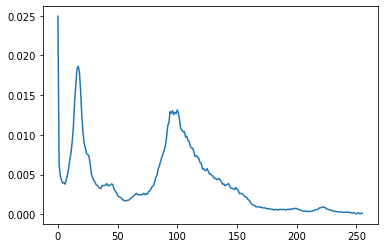

In [254]:
plt.plot(r_hist_dist)

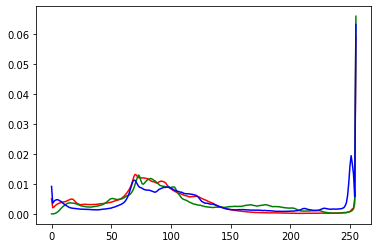

In [259]:
hist_sum = np.zeros(256*3, dtype=int)
for img_name in img_name_list:
    pil_img = Image.open(img_name).convert('RGB')    
    hist = np.array(pil_img.histogram())
    
    hist_sum += hist
    
r_hist_sum = hist_sum[0: 256*1]
g_hist_sum = hist_sum[256*1 : 256*2]
b_hist_sum = hist_sum[256*2: 256*3]    

r_hist_dist = r_hist_sum / np.sum(r_hist_sum)
g_hist_dist = g_hist_sum / np.sum(g_hist_sum)
b_hist_dist = b_hist_sum / np.sum(b_hist_sum)

plt.figure()
plt.plot(r_hist_dist, color='r')
plt.plot(g_hist_dist, color='g')
plt.plot(b_hist_dist, color='b')
plt.show()


In [257]:
np.sum(r_hist_sum), np.sum(r_hist_dist), np.sum(g_hist_sum), np.sum(g_hist_dist), np.sum(b_hist_sum), np.sum(b_hist_dist)

(4915200, 1.0, 4915200, 1.0, 4915200, 1.0)

# Final Code

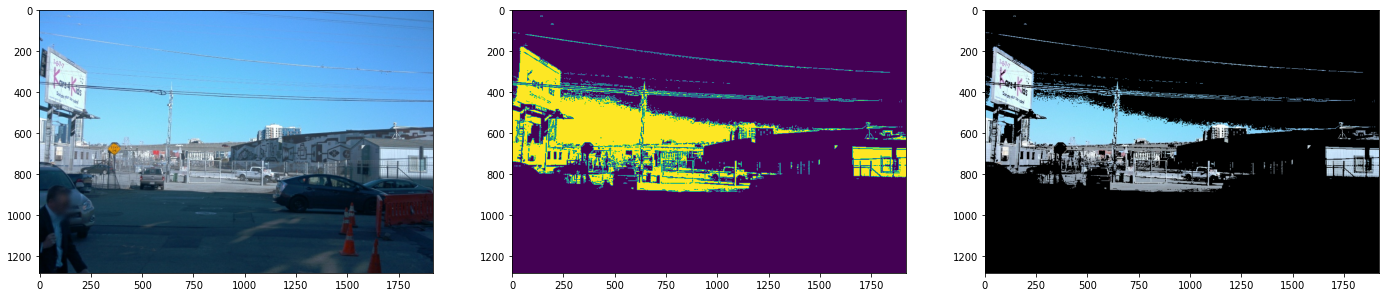

In [120]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def create_mask(path, color_threshold):
    """
    create a binary mask of an image using a color threshold
    args:
    - path [str]: path to image file
    - color_threshold [array]: 1x3 array of RGB value
    returns:
    - img [array]: RGB image array
    - mask [array]: binary array
    """
    # IMPLEMENT THIS FUNCTION
    img = np.array(Image.open(path).convert('RGB'))
    
    mask_idx = (img[:, : , 0] > color_threshold[0]) & (img[:, : , 1] > color_threshold[1]) & (img[:, : , 2] > color_threshold[2])
    mask = np.zeros(mask_idx.shape, dtype=int)
    mask[mask_idx] = 1
    
    return img, mask


def mask_and_display(img, mask):
    """
    display 3 plots next to each other: image, mask and masked image
    args:
    - img [array]: HxWxC image array
    - mask [array]: HxW mask array
    """
    # IMPLEMENT THIS FUNCTION
    stacked_mask = np.stack([mask, mask, mask], axis=2)
    masked_img = img * stacked_mask
    
    f, ax = plt.subplots(1, 3, figsize=(24, 24))
    ax[0].imshow(img)
    ax[1].imshow(mask)
    ax[2].imshow(masked_img)
    plt.show()


if __name__ == '__main__':
    path = 'data/images/segment-1231623110026745648_480_000_500_000_with_camera_labels_38.png'
    color_threshold = [128, 128, 128]
    img, mask = create_mask(path, color_threshold)
    mask_and_display(img, mask)

finish calculate_mean_std [ 95.30968145 110.46818685 123.70005162] [47.02613582 52.31789603 59.47874234]


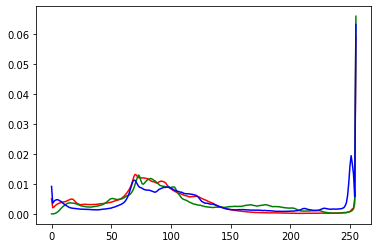

finish channel_histogram
finish all


In [260]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from PIL import ImageStat
import glob

def calculate_mean_std(image_list):
    """
    calculate mean and std of image list
    args:
    - image_list [list[str]]: list of image paths
    returns:
    - mean [array]: 1x3 array of float, channel wise mean
    - std [array]: 1x3 array of float, channel wise std
    """
    # IMPLEMENT THIS FUNCTION
    mean_lst = []
    stddev_lst = []
    for img_name in image_list:
        pil_img = Image.open(img_name).convert('RGB')    
        img_stat = ImageStat.Stat(pil_img)

        mean_lst.append(img_stat.mean)
        stddev_lst.append(img_stat.stddev)

        mean = np.mean(mean_lst, axis=0)
        std = np.mean(stddev_lst, axis=0)

    print('finish calculate_mean_std', mean, std)
    return mean, std


def channel_histogram(image_list):
    """
    calculate channel wise pixel value
    args:
    - image_list [list[str]]: list of image paths
    """
    # IMPLEMENT THIS FUNCTION
    hist_sum = np.zeros(256*3, dtype=int)
    for img_name in image_list:
        pil_img = Image.open(img_name).convert('RGB')    
        hist = np.array(pil_img.histogram())

        hist_sum += hist

    r_hist_sum = hist_sum[0: 256*1]
    g_hist_sum = hist_sum[256*1 : 256*2]
    b_hist_sum = hist_sum[256*2: 256*3]    

    r_hist_dist = r_hist_sum / np.sum(r_hist_sum)
    g_hist_dist = g_hist_sum / np.sum(g_hist_sum)
    b_hist_dist = b_hist_sum / np.sum(b_hist_sum)

    plt.figure()
    plt.plot(r_hist_dist, color='r')
    plt.plot(g_hist_dist, color='g')
    plt.plot(b_hist_dist, color='b')
    plt.show()  

    print('finish channel_histogram')

if __name__ == "__main__": 
    image_list = glob.glob('data/images/*')
    mean, std = calculate_mean_std(image_list)
    channel_histogram(image_list)
    print('finish all')